In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
#Images
from PIL import Image
import glob
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

In [2]:
from PIL import Image
import glob

def getImagesDf(emotion):
    path = f'samples/{emotion}/'
    df = pd.DataFrame()
    x=0
    for filename in glob.glob(f"{path}*.jpg"):
        df.loc[x,"filename"] = filename.split('\\')[0]+'/'
        df.loc[x,"image"] = filename.split("\\")[1]
        df.loc[x,"emotion"] = emotion

        x+=1
    for filename in glob.glob(f"{path}*.png"):
        df.loc[x,"filename"] = filename.split('\\')[0]+'/'
        df.loc[x,"image"] = filename.split("\\")[1]
        df.loc[x,"emotion"] = emotion
        x+=1

    return df   

In [3]:
from collections import OrderedDict 
emotions_get = OrderedDict([('angry',1),('disgust', 2),('fear', 3),('happy', 4),('neutral', 5),('sad', 6),('surprise', 7)]) 
emotions = pd.DataFrame(columns=["filename","image","emotion","label","image_process"])

for k,v in emotions_get.items():
    df = getImagesDf(k)
    df["label"] = v
    emotions = emotions.append(df,ignore_index=True,sort=True)
emotions.tail()

,emotion,filename,image,image_process,label
580,surprise,samples/surprise/,ray_surprise_744.png,NaN,7
581,surprise,samples/surprise/,ray_surprise_745.png,NaN,7
582,surprise,samples/surprise/,ray_surprise_746.png,NaN,7
583,surprise,samples/surprise/,ray_surprise_747.png,NaN,7
584,surprise,samples/surprise/,ray_surprise_748.png,NaN,7


In [4]:
def imageProcess(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        img = cv2.resize(face_clip, (350, 350))  #resizing image
    return img 

In [5]:
import time
for i, row in enumerate(emotions.itertuples()):
    try:
        path = f"{row.filename.strip()}{row.image.strip()}"
        img = imageProcess(path)
        emotions.loc[i,"image_process"] = img
        time.sleep(.2)
    except:
        print(path)
        emotions.loc[i,"image_process"] = np.nan

emotions.head()

samples/angry/malcolm_anger_841.png
samples/angry/malcolm_anger_843.png
samples/angry/malcolm_anger_844.png


,emotion,filename,image,image_process,label
0,angry,samples/angry/,377.jpg,"[[[122, 122, 122], [159, 159, 159], [135, 135,...",1
1,angry,samples/angry/,387.jpg,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2,angry,samples/angry/,393.jpg,"[[[42, 42, 42], [57, 57, 57], [53, 53, 53], [5...",1
3,angry,samples/angry/,404.jpg,"[[[255, 255, 255], [253, 253, 253], [255, 255,...",1
4,angry,samples/angry/,409.jpg,"[[[153, 153, 153], [170, 170, 170], [169, 169,...",1


In [6]:
emotions.isna().sum()

emotion          0
filename         0
image            0
image_process    3
label            0
dtype: int64

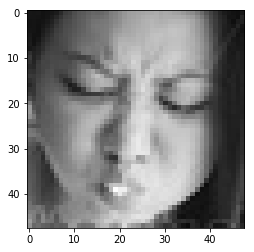

In [25]:
# Drop the null rows
emotions = emotions.dropna()

plt.imshow(emotions.image_process[100])

In [62]:
X = emotions["image_process"].values.reshape(-1,1)
y = emotions["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
emotions.flat_img[20].shape

(7500,)

In [70]:
# ndims = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], ndims)
# X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (436,)
Testing Shape: (146,)


In [10]:
emotions["flat_img"] = emotions["image_process"].map(lambda x: x.reshape(-1))
emotions.head()

,emotion,filename,image,image_process,label,flat_img
0,angry,samples/angry/,377.jpg,"[[[122, 122, 122], [159, 159, 159], [135, 135,...",1,"[122, 122, 122, 159, 159, 159, 135, 135, 135, ..."
1,angry,samples/angry/,387.jpg,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,angry,samples/angry/,393.jpg,"[[[42, 42, 42], [57, 57, 57], [53, 53, 53], [5...",1,"[42, 42, 42, 57, 57, 57, 53, 53, 53, 58, 58, 5..."
3,angry,samples/angry/,404.jpg,"[[[255, 255, 255], [253, 253, 253], [255, 255,...",1,"[255, 255, 255, 253, 253, 253, 255, 255, 255, ..."
4,angry,samples/angry/,409.jpg,"[[[153, 153, 153], [170, 170, 170], [169, 169,...",1,"[153, 153, 153, 170, 170, 170, 169, 169, 169, ..."


In [17]:
X = emotions["flat_img"]
y = emotions["label"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Create an empty sequential model
model = Sequential()

In [20]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape))

W0717 11:07:57.960280  5052 deprecation.py:506] From C:\Users\bethf\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'tuple'.

In [ ]:
x = tf.placeholder(tf.float32)